In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import step, legend, xlim, ylim, show, cm
from matplotlib import colors
import numpy as np
from matplotlib.lines import Line2D

In [2]:
def hadoop(path): return os.popen("hadoop fs -cat " + path)
def hadoopGz(path): return os.popen("hadoop fs -cat " + path + "/*.gz | zcat")

In [3]:
def plotHostDist(file):
    dat = [line.rstrip('\n').split(",") for line in hadoopGz(file)]
    
    fig, ax = plt.subplots()
    defaultSize = fig.get_size_inches()
    fig.set_size_inches((defaultSize[0] * 2, defaultSize[1] * 2))

    ax.set_xlabel('#urls', fontsize = 30)
    ax.set_ylabel('#hosts', fontsize = 30)
    
    ax.set_xlim([0, 400])
    ax.set_ylim([0, 400])

    # http://matplotlib.org/examples/color/colormaps_reference.html
    blues = cm.get_cmap("Blues")

    def col(lst, idx, parse): return [parse(row[idx].lstrip('(').rstrip(')')) for row in lst]
    
    ax.scatter(col(dat, 0, int), col(dat, 1, int), color = blues(250))
    
    plt.show()

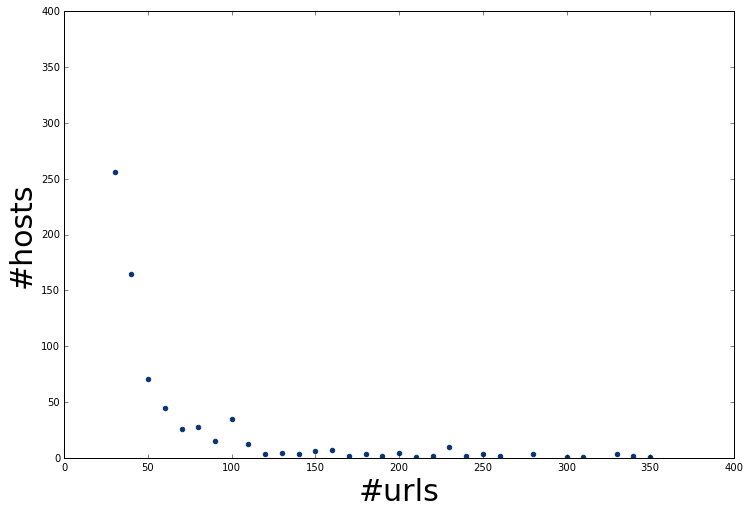

In [4]:
plotHostDist("hostDist.gz")